## Project Name: Climate Change Belief Analysis

## Team members
#### 1. Christinah Chokwe
#### 2. Malibongwe Shange 
#### 3. Henre Van der Berg 
#### 4. Tsepo 
#### 5. Josias Tsiri


## Table of Contents

## Introduction
Climate change and its consequences have become one of the major concerns worldwide.To preserve life on earth, we have to reduce our carbon footprint.Various organisations and governments are heading the call by scientists to reduce our carbon footprint. As such, public education has been rolled down by various goverments and organisations. Companies are also heading the call by adapting their products inorder to reduce their carbon footprint.

To get an insight into the public opinion about climate change, social media websites such as Twitter are the best source to mine data on topics related to climate change.Text analytics is a method of analysing unstructured data in order to find trends or predict popular sentiments, which can assist organisations in making decisions.

In this project we will attempt to create a model to predict the sentiment of tweets on Twitter regarrding climate change. Sentiment analysis refers to classifying the sentiments that is collected from a text source. In this project we will be using Twitter data because of the large amount of data available. This data is thus useful in trying to understand the opinions of people regarding climate change.

<img src='carbon-footprint.png' style='width:500px;height:50'/>

## What is Natural Language Processing?

Natural language is the language you and I talk in. It could be Hindi, English, Spanish, anything. And we talk about natural language processing, we basically refer to making computers able to process this language, and more importantly understand it and take actions based on it. Now this language can be text based or audio based. Your Google Voice assistant, Siri and even google translator are great examples of this.


## Problem Statement

To build a machine learning model that is able to analyze tweets collected from  the app twitter, and be able to judge the sentiments behind the tweets. The model should be able to take tweets and judge if they are of positive, negative or neutral sentiments. These types of models are massively used by Twitter and Facebook, to filter out to say hate speeches, or other unwanted comments on their platforms.

This model will help improve Thrive market's advertising effectiveness whereby the company will be able to develop effective marketing tools to target the relevent customers

In [58]:
pip install comet_ml


  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19191 sha256=5bf85d144b2ae2a284bebb210528a32ec5290b5a2dfbc01c49ad72b66da8b990
  Stored in directory: c:\users\rami-chrisie\appdata\local\pip\cache\wheels\b9\b1\68\cb4feab29709d4155310d29a421389665dcab9eb3b679b527b
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=d657f91a387e116ef023c105715dfa1c04bef403cf834868f25d3e7e61b49f29
  Stored in directory: c:\users\rami-chrisie\appdata\local\pip\cache\wheels\34\2a\24\a490264ae9041fd48f778ff393526572c80bb498ddecb07ea5
Successfully built nvidia-ml-py3 configobj


In [3]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="tlEUYSeSDzTgp9zJ7AKGaOkEl",
    project_name="team-9-jhb-classification",
    workspace="christinah-chokwe-gmail-com",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/christinah-chokwe-gmail-com/team-9-jhb-classification/bb0ab0969f5f4dcf9d82b2ee020ea297



## Import Packages
Here we import the packages and modules that will be used in this project.

In [10]:
# Import packages

# Database manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

# Natural language Toolkit packages.
# Necessary libraries and modules that are 
# going to help us do the data processing 
# from the nltk library.
import nltk

#nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
import string

# Regular expression
import re

# to make bag of words
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

# Packages to create models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC  # Model takes to long to train
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.utils import resample

# Save trained models
import pickle


import warnings
warnings.filterwarnings('ignore')

## Read and Load the Dataset

Here we import the dataset so that we will be able to manipulate the data.

In [11]:
# Import dataset

tweets = pd.read_csv("train.csv")

## Exploratory Data Analysis

short explanation

#### Top 5 records of the data

In [3]:
tweets.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


#### Shape of the data

In [6]:
tweets.shape

(15819, 3)

#### Columns/features in the data

In [4]:
tweets.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

#### Length of the dataset

In [8]:
print('The number of columns in the data is:  ', len(tweets.columns))
print('The number of rows in the data is:  ', len(tweets))

The number of columns in the data is:   3
The number of rows in the data is:   15819


 The dataset has 3 features and 15819 tweets.

#### Data Information

In [184]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


#### Check for Null values

In [190]:
tweets.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

#### Check uniques target values

In [4]:
tweets['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

#### Sentiment Description:
* 2 News: the tweet links to factual news about climate change

* 1 Pro: the tweet supports the belief of man-made climate change

* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

* -1 Anti: the tweet does not believe in man-made climate change

#### Number of target values

In [5]:
tweets['sentiment'].nunique()

4

Above we can see that the dataset has four unique target variables.

## Data Visualization of Target Variables

Here we will be plotting the distributions of the dataset in different ways.

In [18]:
#Making a copy of the the tweet dataframe from which we will create a dictionary of the sentiments
tweets_copy = tweets
sentiment_human = {-1: "Anti", 0: "Neutral", 1: "Pro", 2: "News"}
tweets_copy["sentiment"] = tweets["sentiment"].apply(lambda num: sentiment_human[num])


In [19]:
#Calculating the count for each value
tweets_copy["sentiment"].value_counts()

Pro        8530
News       3640
Neutral    2353
Anti       1296
Name: sentiment, dtype: int64

In [20]:
def perc_on_bar(feature):
    '''
    plot
    feature: sentiment
    '''
    #Creating a countplot for the features
    sns.set(rc={'figure.figsize':(10,7)})
    ax=sns.countplot(x=feature, data=tweets_copy)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the sentiment
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # heightt of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

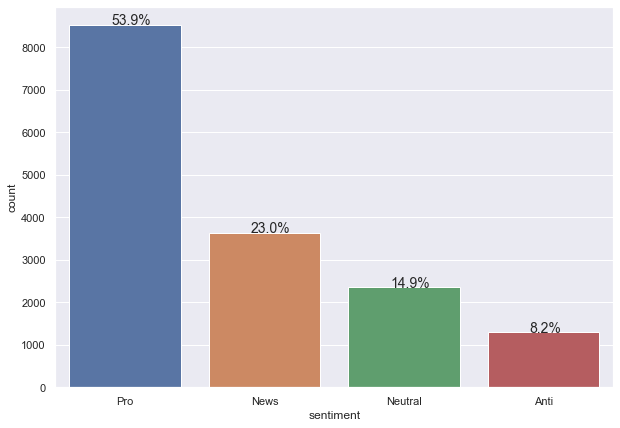

In [21]:
perc_on_bar(tweets_copy['sentiment'])

#### Pie chart

<AxesSubplot:ylabel='sentiment'>

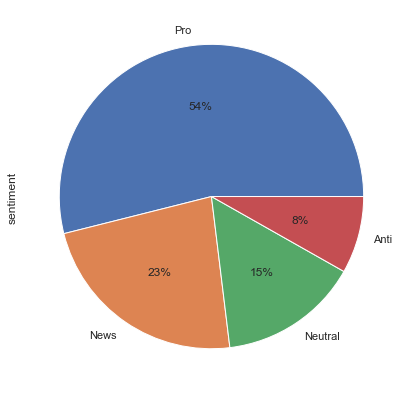

In [22]:
tweets_copy['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')


From the output pie chart we can see that there is a clear imbalance in the data whereby the sentiments: 1 Pro: climate change holds the majority of tweets. This will have to be addressed later.

#### Bar chart

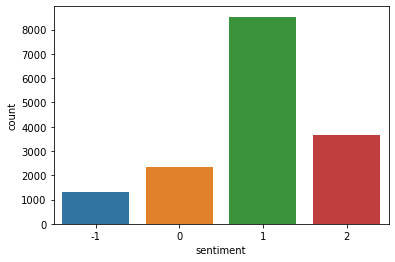

In [45]:
sns.countplot(x='sentiment', data=tweets)
plt.show()

#### Histogram

We will use the histogram to find out if there is a correlation between the sentiment class and the lenth of the tweet. 

array([[<AxesSubplot:title={'center':'Anti'}>,
        <AxesSubplot:title={'center':'Neutral'}>],
       [<AxesSubplot:title={'center':'News'}>,
        <AxesSubplot:title={'center':'Pro'}>]], dtype=object)

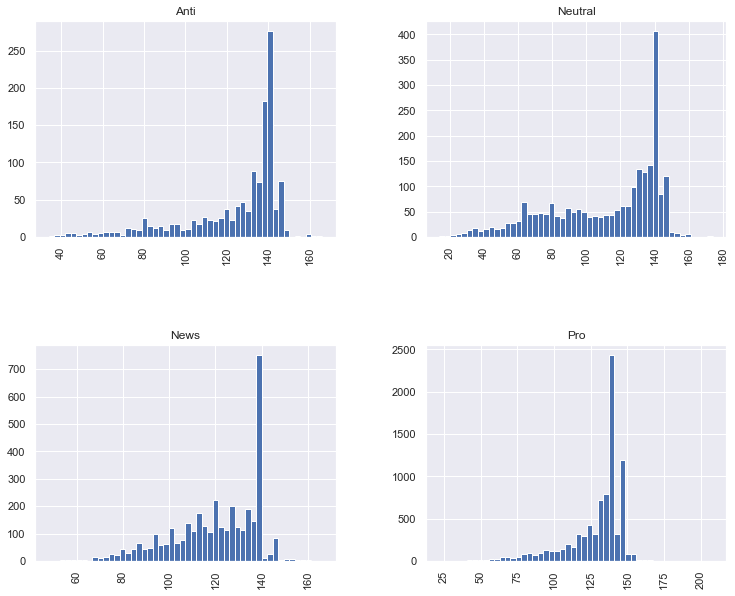

In [23]:
tweets_copy['len_tweet'] = tweets_copy['message'].apply(len)
tweets_copy.hist(column='len_tweet', by = 'sentiment', bins = 50, figsize = (12,10))

In [28]:
#Longest message
max(tweets_copy.message.str.len())

208

In [27]:
#Shortest message
min(tweets_copy.message.str.len())

14

## Data Preprocessing  


In NLP projects, the most important part is data preprocessing, to get it ready for modelling. This is our next step.
Since there is a unnecessary parameter (tweetid) in the dataset, lets extract and store the input and the output, which are the 'message' and 'sentiment'  columns using the following lines:

### Class imbalances
As we can see from the distrubution plot above there are imbalances in the datasaet. Below we will attempt to correct the imbalances in the data by resampling.

In [12]:
pro_df = tweets[tweets['sentiment'] == 1]
anti_df = tweets[tweets['sentiment'] == -1]
neutral_df = tweets[tweets['sentiment'] == 0]
news_df = tweets[tweets['sentiment'] == 2]

print('pro_df:' ,len(pro_df),'\nanti_df:',len(anti_df), '\nneutral_df:', len(neutral_df), '\nnews_df:', len(news_df))

pro_df: 8530 
anti_df: 1296 
neutral_df: 2353 
news_df: 3640


Below we will resample the data, as we can see the highest value is pro_df has 8530 entries, and the lowest value is anti_df with 1296, thus a good middle ground is news_df at 3640.
We will downsample data > 3640 and upsample data < 3640.

In [13]:
# Downsample
pro_df_scale = resample(pro_df,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(news_df), # match number in minority class
                          random_state=42) 

# Upsamle
neutral_df_scale = resample(neutral_df,
                          replace=True, # sample without replacement (no need to duplicate observations)
                          n_samples=len(news_df), # match number in minority class
                          random_state=42)

anti_df_scale = resample(anti_df,
                          replace=True, # sample without replacement (no need to duplicate observations)
                          n_samples=len(news_df), # match number in minority class
                          random_state=42)

In [14]:
print('pro_df size:' ,len(pro_df_scale),'\nanti_df:',len(anti_df_scale),
      '\nneutral_df:', len(neutral_df_scale), '\nnews_df:', len(news_df))

pro_df size: 3640 
anti_df: 3640 
neutral_df: 3640 
news_df: 3640


In [15]:
# combine dataframes

data = pd.concat([pro_df_scale,anti_df_scale,neutral_df_scale,news_df])
data.shape

(14560, 3)

### What do we need to do in Data Processing?

Remember our input is just a bunch of words for now. Machine learning models only understand and works on numbers. So we have to convert all the text into numbers.

The following techniques will be used to remove uncessary words:

1. Removing Stop Words and url: Words such as: ('this, an, a, the, etc') that do not affect the meaning of the tweet
2. Removing Punctuation: (‘,.*!’) and other punctuation marks that are not really needed by the model
3. Stemming: Which reduces words like ‘jumping, jumped, jump’ into their root word(also called stem), which is jump in this case. Since all variations of the root word convey the same meaning, we don’t need each of the word to be converted into different numbers.
4. Lemmatization: Lemmatizing is the process of grouping words of similar meaning together

Step 3 and 4 will be compiled together.

#### First the stopwords and puntuation are declared.

In [16]:
stop_words = stopwords.words('english')
punct = string.punctuation


#### Applying Stemming
We wil be using Porter Stemmer to stem the data.
Now, for more data processing, we use the following lines of code.

#### Applying Lemmatization

A very similar operation to stemming is called lemmatization. Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.


In [81]:
# Calling the functions for the Stemming and Lemmatization process.

stemmer1 = PorterStemmer()
lemmatizer = WordNetLemmatizer()

Below is initial data cleaning with no resampled/ imbalanced data. This cleaned_data will be used to ensure the cleaning process is sufficient before moving on to additional functions.

In [17]:
# Function to clean data

def clean_data(df):
    """ Explain
    
    """
    
    stemmer1 = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stop_words = stopwords.words('english')
    punct = string.punctuation

    clean_list = []
    
    for i in range(len(df)):
        #Removing urls from messages
        tweet=re.sub(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?',' ',df.iloc[i]) 
        #Makes sure only letters are in the message
        tweet=re.sub('[^a-zA-Z]',' ',tweet)  
        #Convert all letters to lowercase and split them
        tweet=tweet.lower().split()   
        # Stems the words in tweet if it does notcontain stopwords and punctuation. 
        tweet=[stemmer1.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]  
        # Lemmatize the words in the tweets                                                                                                  
        tweet = [lemmatizer.lemmatize(word) for word in tweet]  
        # Joining the cleaned split words
        tweet=' '.join(tweet)  
        # Creates a list of the cleaned tweets.
        clean_list.append(tweet)  
    return clean_list


In [18]:
X = tweets['message']
y = tweets['sentiment']

In [19]:
cleaned_data_1 = clean_data(X)

Have a look at the cleaned data below.

In [42]:
cleaned_data_1[:5]

['polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming and wait what',
 'it s not like we lack evidence of anthropogenic global warming',
 'rt rawstory researcher say we have three year to act on climate change before it s too late',
 'todayinmaker wired wa a pivotal year in the war on climate change',
 'rt soynoviodetodas it s and a racist sexist climate change denying bigot is leading in the poll electionnight']

Firstly, we create an empty list called cleaned_data, where will be storing our text data after getting rid of all unnecessary words.

We import a library called re(regular expressions), that is gonna help us remove a lot of unnecessary stuff.

To begin with, we run a for loop to iterate through each and every tweet in the dataset, at a time. Using re.sub we can substitute and replace things in a sentence. So we are basically taking one tweet at a time, and inside it whatever is not a letter(belonging to a-z or A-Z) and url, will be replaced by an empty space. It will automatically filter out punctuation marks and other non-letters.

In the next line, we convert all words into lower cases and split them into a list.

Next, we iterate through each word in a tweet, and if that word is not a stop word, and not a punctuation mark,we use the word, later this will be used to satisfy the condition for the stemming and lemmatization functions.

After that we join all the words using ‘’.join(tweet), to get a single sentence instead of separated words. And then we simply append that into the cleaned data list that we had created. If you print the cleaned list it should look something the above .

This will be done for all features sets.



### Wordcloud for feature set 1

A wordcloud of this cleaned data will be created to visualize the most frequent 100 word, to make sure that that the words meaningful to the machine learning goal.

A wordcloud will be created for each cleaned data group.


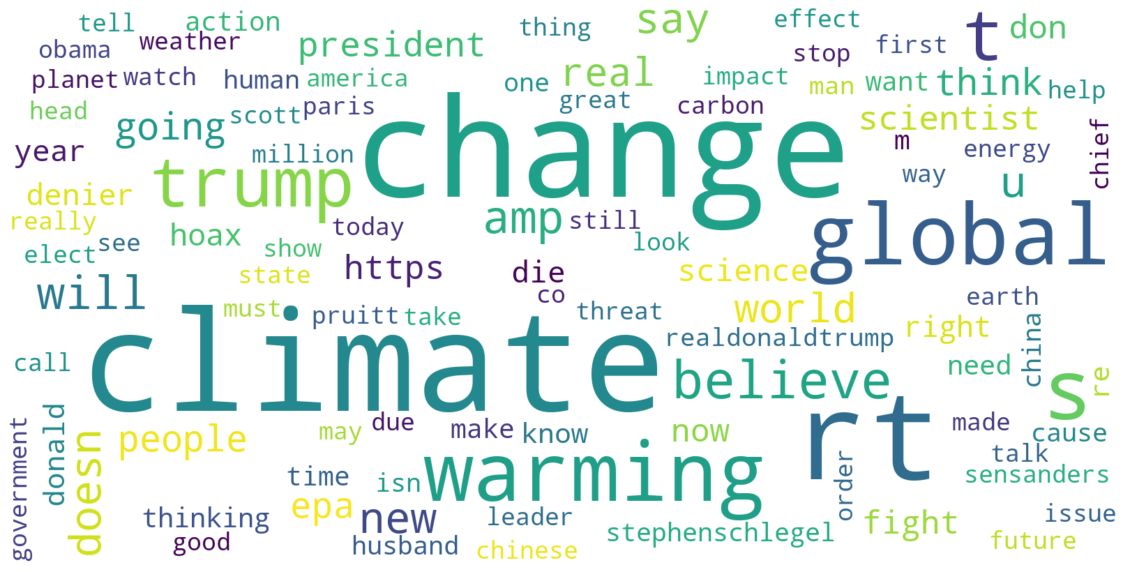

In [20]:
string_1 = pd.Series(cleaned_data_1).str.cat(sep=' ')   #This creates a list of single strings to generate the wordcloud.

wordcloud_1 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(string_1)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

# Scaled data


First split the features and targets of the scaled data and the clean the data with the "clean_data" function.

In [21]:
X_scale = data['message']
y_scale = data['sentiment']

In [22]:
cleaned_data_2 = clean_data(X_scale)

In [23]:
cleaned_data_2[:5]

['rt natgeochannel watch beforetheflood right here as leodicaprio travels the world to tackle climate change',
 'rt sensanders we have a president elect who doesn t believe in climate change millions of people are going to have to say mr t',
 'rt octorg fed court has ruled rights of octorg youth threatened by climate change help them proceed to trial',
 'rt aiannucci the us elected trump but the rest of the world didn what do we do if us policies climate change threaten the re',
 'rt sensanders we have a president elect who doesn t believe in climate change that s frightening for this country and the world']

### Wordcloud for feature set 2
Another wordcloud will be created to ensure the most frequent words are of importance, these additional stopwords will be appended to the list add_stopwords

In [24]:
string_2 = pd.Series(cleaned_data_2).str.cat(sep=' ') 

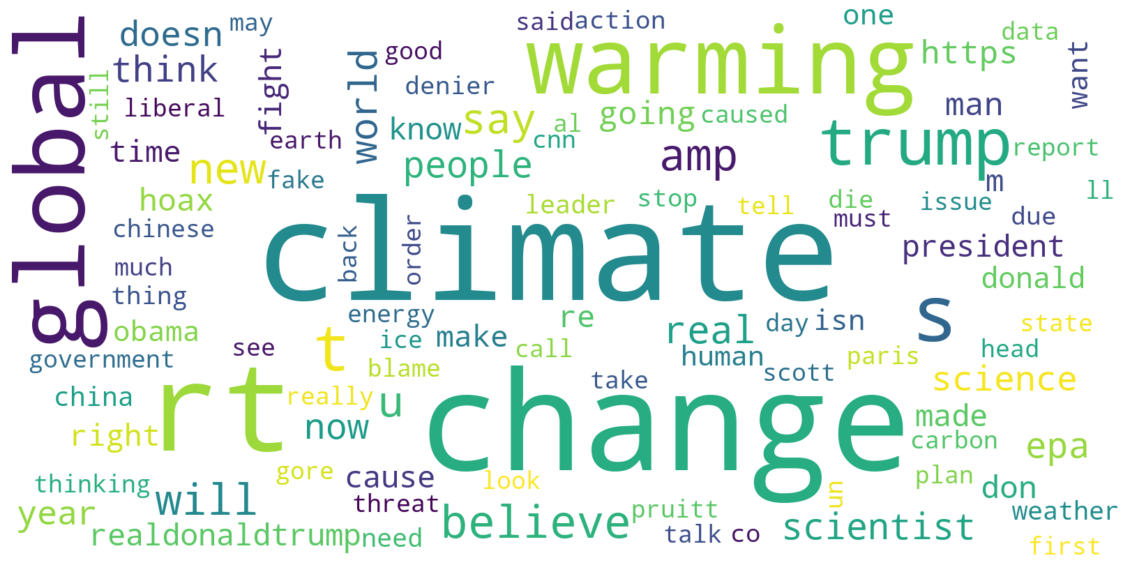

In [25]:

wordcloud_2 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(string_2)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.show()


Above we created three goups of cleaned data, with additional stopword = add_stopword, This will be used in the section below when we create our bag of words.

Let’s have a look at the output column ‘y’

In [26]:
y.head()

0    1
1    1
2    2
3    1
4    1
Name: sentiment, dtype: int64

As we can see the output is already in numeric format, so no processing is necessary.

## Build the NLP models

In this section multiple models will be build in order to find the mosr accurate model, the accuracy of the model will be measured by the f1 score. Now to build the model we split the dataset into a training and testing section(testing size=20% of the actual data and use random_state = 42). To actually fit the model, we call the model.fit function and supply it the training input and output.

#### Splitting the Data
Two train test split goups will be created for X_1 to X_2 to evalute the accuracy.

In [27]:
X_1 = cleaned_data_1 #unscaled data
y_1 = tweets['sentiment']

X_2 = cleaned_data_2 #scaled data
y_2 = data['sentiment']


# Split 1 (All data with no scaling)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2 , random_state = 42)

# Split2
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2 ,y_2, test_size=0.2 , random_state = 42)



## Transforming Dataset: Text to Numeric

Algoritms use numeric data to train models. Thus to make algorithms works with text, we have to convert text to numbers. We will use the Bag of Words methods to do this.

### Bag of Words
Now that input data is clean and ready, we convert it into numbers using ‘Bag of Words’ approach. Basically we create a matrix table, where each row represents a sentence and each word will have separate column for itself that represents it’s frequency.

#One con about this method that you might not notice is that the order of the sentence is lost. There are other approaches to counter this, but we are just going to stick with this method.



#### Fit CountVectorizer
Here the three feature sets of cleaned data will be fitted to CountVectorizer and then transfromed in order to produce numeric data.

In [28]:

count_vector_1 = CountVectorizer(max_features = 5000, stop_words= stop_words)
X_train_1 = count_vector_1.fit_transform(X_train_1).toarray()
X_test_1 = count_vector_1.transform(X_test_1).toarray()


count_vector_2 = CountVectorizer(max_features = 5000, stop_words= stop_words)
X_train_2 = count_vector_2.fit_transform(X_train_2).toarray()
X_test_2 = count_vector_2.transform(X_test_2).toarray()
                                 


The Count Vectorizer function converts a list of words into bag of words, however notice that we specify something called as the max features to it. Basically as you might have seen in the bag of words illustration table, each word will have separate column. This number of columns can explode into large numbers in big datasets.

To avoid this we set the max columns as 5000, and basically keep the maximum occurring 5000 words. Also we set the stop_words parameter to the new_stop_words list that was created, as we want to remove that from the tweets as well.

Finall the count_vector_1.fit_transform function takes the X_test_1 data and converts it into the bag of words that we wanted.

#### Model 1: MultinomialNB
Multinomial Naive Bayes model will be used to figure out the relationship between the input and the output. Multinomial NB is a supervised learning algorithm that works really well for text based data.

In [29]:
# Initialize model

MNB_model_1 = MultinomialNB()

# Fit the model
MNB_model_1.fit(X_train_1, y_train_1)
#Create Predition
y_pred_1 = MNB_model_1.predict(X_test_1)

#Get f1_score

f1score_1 = f1_score(y_test_1, y_pred_1, average= 'weighted')
print('macro f1 score:', f1score_1)

macro f1 score: 0.6990955092479377


In [30]:
MNB_model_2 = MultinomialNB()

MNB_model_2.fit(X_train_2, y_train_2)
y_pred_2 = MNB_model_2.predict(X_test_2)


f1score_2 = f1_score(y_test_2, y_pred_2, average= 'weighted')
print('macro f1 score:', f1score_2)

macro f1 score: 0.7367049149987133


#### Model 2: LogisticRegression

In [31]:


LR_model_1 = LogisticRegression()

LR_model_1.fit(X_train_1, y_train_1)
y_pred_4 = LR_model_1.predict(X_test_1)


f1score_4 = f1_score(y_test_1, y_pred_4, average= 'weighted')
print('macro f1 score:', f1score_4)

macro f1 score: 0.7205708115060445


In [32]:
LR_model_2 = LogisticRegression()

LR_model_2.fit(X_train_2, y_train_2)
y_pred_5 = LR_model_2.predict(X_test_2)



f1score_5 = f1_score(y_test_2, y_pred_5, average= 'weighted')
print('macro f1 score:', f1score_5)

macro f1 score: 0.7999186834706772


#### Model 3: RandomForestClassifier

In [33]:


Forest_model_1 = RandomForestClassifier()

Forest_model_1.fit(X_train_1, y_train_1)
y_pred_7 = Forest_model_1.predict(X_test_1)



f1score_7 = f1_score(y_test_1, y_pred_7, average= 'weighted')
print('macro f1 score:', f1score_7)

macro f1 score: 0.6868802537361015


In [34]:
Forest_model_2 = RandomForestClassifier()

Forest_model_2.fit(X_train_2, y_train_2)
y_pred_8 = Forest_model_2.predict(X_test_2)



f1score_8 = f1_score(y_test_2, y_pred_8, average= 'weighted')
print('macro f1 score:', f1score_8)

macro f1 score: 0.805829496842519


#### Model_4: LinearSVC

In [101]:
svc_model_1 = LinearSVC()

svc_model_1.fit(X_train_1, y_train_1)
y_pred_10 = svc_model_1.predict(X_test_1)

f1score_10 = f1_score(y_test_1, y_pred_10, average= 'weighted')
print('macro f1 score:', f1score_10)

macro f1 score: 0.6977435966265072


In [102]:
svc_model_2 = LinearSVC()

svc_model_2.fit(X_train_2, y_train_2)
y_pred_11 = svc_model_2.predict(X_test_2)

f1score_11 = f1_score(y_test_2, y_pred_11, average= 'weighted')
print('macro f1 score:', f1score_11)

macro f1 score: 0.8027135857889598


## Compare models

Models will be compared based on the f1 score the model in tabular format.
Expand on f1 score

In [103]:
model_comp = {'model_name' : ['MultinomialNB_1', 'MultinomialNB_2',
                              'LogisticRegression_1', 'LogisticRegression_2',
                              'RandomForestClassifier_1', 'RandomForestClassifier_2',
                             'LinearSVC_1', 'LinearSVC_2'
                             ],
                   'f1_score' : [f1score_1, f1score_2,
                                 f1score_4 ,f1score_5,
                                 f1score_7, f1score_8,
                                f1score_10, f1score_11]
                                 }


model_comp_df = pd.DataFrame(model_comp)

In [104]:
model_comp_df.sort_values('f1_score',ascending=False)

,model_name,f1_score
5,RandomForestClassifier_2,0.818659
7,LinearSVC_2,0.802714
3,LogisticRegression_2,0.800015
1,MultinomialNB_2,0.730569
2,LogisticRegression_1,0.720293
6,LinearSVC_1,0.697744
4,RandomForestClassifier_1,0.696797
0,MultinomialNB_1,0.694654


From the evaluation table above we can see that RandomForestClassifier_2 has the best f1 score, but on the Kaggle scoreboard it recieves a score of 0.6289. The best scoring model on the Kaggle scoreboard is LogisticRegression_1 with a score of 0.71728.

Explain why it is a good choice.

## Pickled Models

To create the Streamlit app we need to save the models we intent to us as well as the Bag of Words method which is the CountVectorizer method.

In [113]:
# Logistice Regression model 1

LR_model_1_path = 'trained models\LR_model_1.pkl'

with open(LR_model_1_path, 'wb') as file:
    pickle.dump(LR_model_1, file)
    
# LinearSVC model 1

svc_model_1_path = 'trained models\svc_model_1.pkl'

with open(svc_model_1_path, 'wb') as file:
    pickle.dump(svc_model_1, file)
    
# Random forest model 1

Forest_model_1_path = 'trained models\Forest_model_1.pkl'

with open(Forest_model_1_path, 'wb') as file:
    pickle.dump(Forest_model_1, file)
    
# MNB_model_1

MNB_model_1_path = 'trained models\MNB_model_1.pkl'

with open(MNB_model_1_path, 'wb') as file:
    pickle.dump(MNB_model_1, file)
    
# Bag of Words: Count Vectorizer

count_vector_1_path = 'trained models\count_vector_1.pkl'

with open(count_vector_1_path, 'wb') as file:
    pickle.dump(count_vector_1, file)

## Conclusion

type here

## Kaggle submition


In [35]:
test_df = pd.read_csv('test_with_no_labels.csv')

In [36]:
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


### Preprocessing for LogisticRegression_1

In [112]:
test_df = pd.read_csv('test_with_no_labels.csv')

X_test = test_df['message']

cleaned_data = clean_data(X_test)

#for i in range(len(X_test)):
#    tweet=re.sub(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?',' ',X_test.iloc[i])  #Removing urls from messages
#    tweet=re.sub('[^a-zA-Z]',' ',tweet)                                            #Makes sure only letter are in the message 
#    tweet=tweet.lower().split()
#    tweet=[stemmer1.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
#    tweet = [lemmatizer.lemmatize(word) for word in tweet]
#    tweet=' '.join(tweet)
#    cleaned_data.append(tweet)

    
# Transform data to correct vectorizer
#X_fin = count_vector_1.transform(cleaned_data).toarray()       # Non scaled data                  
X_fin = count_vector_2.transform(cleaned_data).toarray()       # Scaled data
    

# MNB_model_1
#LR_model_1
# Forest_model_1
#svc_model_1

# MNB_model_2
#LR_model_2
# Forest_model_2
#svc_model_2
y_pred_test = svc_model_2.predict(X_fin)

test_df['sentiment'] = y_pred_test
output_df = test_df[['tweetid', 'sentiment']]

# .to_csv creates a new csv file in the local folder
output_df.to_csv('svc_model_2.csv', index = False)

In [88]:
y_pred_test

array([ 1, -1,  0, ...,  2,  2,  2], dtype=int64)

In [8]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/christinah-chokwe-gmail-com/team-9-jhb-classification/4d21c6f386944126ab9cf0523378671a
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (6.73 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: Th

In [4]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/christinah-chokwe-gmail-com/team-9-jhb-classification/bb0ab0969f5f4dcf9d82b2ee020ea297
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (6.74 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: Th